In [1]:

!pip install pandas
!pip install numpy
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install seaborn
!pip install yfinance
!pip install statsmodela

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement statsmodela (from versions: none)
ERROR: No matching distribution found for statsmodela


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df = pd.read_csv(r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\raw_analyst_ratings.csv\raw_analyst_ratings.csv', parse_dates=['date'])
df.sample(4)

,Unnamed: 0,headline,url,publisher,date,stock
1151371,1157015,55 Biggest Movers From Yesterday,https://www.benzinga.com/news/18/05/11693478/5...,Lisa Levin,2018-05-11 00:00:00,SN
1362386,1368814,Willis Group Says Quarterly Cash Dividend Incr...,https://www.benzinga.com/news/12/02/2344556/wi...,Eddie Staley,2012-02-14 00:00:00,WSH
435201,437519,BofA: The Biotech Sector Is In A 'Perfect Stor...,https://www.benzinga.com/analyst-ratings/analy...,Jayson Derrick,2018-01-05 00:00:00,ESPR
290203,291882,KeyBanc Downgrades Computer Programs and Syste...,https://www.benzinga.com/news/14/06/4628103/ke...,Paul Quintaro,2014-06-12 00:00:00,CPSI


In [14]:
df["headline_length"] = df["headline"].apply(len)
print("\nDescriptive Summary:")
df['headline_length'].describe()


Descriptive Summary:


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [15]:
daily_headlines = df.groupby('date').size()

In [16]:
daily_headlines

date
2009-02-14 00:00:00          1
2009-04-27 00:00:00          2
2009-04-29 00:00:00          1
2009-05-22 00:00:00          1
2009-05-27 00:00:00          6
                            ..
2020-06-11 16:49:41-04:00    1
2020-06-11 16:51:33-04:00    1
2020-06-11 17:01:39-04:00    1
2020-06-11 17:11:20-04:00    1
2020-06-11 17:12:35-04:00    1
Length: 39957, dtype: int64

In [17]:
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)

In [18]:
time_series_data

,Headlines_Count
date,
2009-02-14 00:00:00,1
2009-04-27 00:00:00,2
2009-04-29 00:00:00,1
2009-05-22 00:00:00,1
2009-05-27 00:00:00,6
...,...
2020-06-11 16:49:41-04:00,1
2020-06-11 16:51:33-04:00,1
2020-06-11 17:01:39-04:00,1


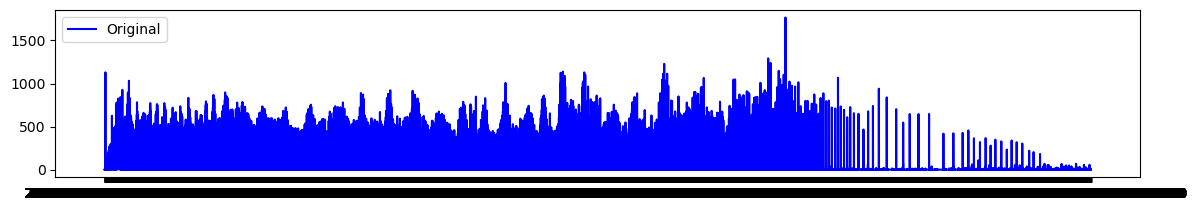

In [19]:
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.show()

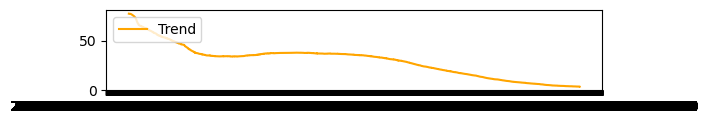

In [26]:
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=10000)

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Text Analysis(Sentiment analysis & Topic Modeling)

In [ ]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the headlines
df['sentiment'] = df['headline'].apply(get_sentiment)
print(df)

In [ ]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import nltk
# Download necessary NLTK datasets
nltk.download('stopwords')     # For stopword removal
nltk.download('punkt')         # For tokenization
nltk.download('wordnet')       # For lemmatization
nltk.download('omw-1.4')       # Optional, for better lemmatization with WordNet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ephre\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ephre\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ephre\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ephre\AppData\Roaming\nltk_data...


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [ ]:

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens


df['processed_text'] = df['headline'].apply(preprocess_text)


KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Use CountVectorizer to get the frequency of n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=100)
X = vectorizer.fit_transform(df['processed_text'].apply(lambda x: ' '.join(x)))

# Get feature names and their counts
word_counts = X.toarray().sum(axis=0)
keywords = vectorizer.get_feature_names_out()

# Create a DataFrame with keywords and their frequencies
keyword_freq = pd.DataFrame({'keyword': keywords, 'count': word_counts})
keyword_freq = keyword_freq.sort_values(by='count', ascending=False)
print(keyword_freq.head(10))


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Use TF-IDF for LDA
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'].apply(lambda x: ' '.join(x)))

# Define LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(tfidf_matrix)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), 10)


In [ ]:
import spacy

# Load spacy model
nlp = spacy.load('en_core_web_sm')

def extract_events(text):
    doc = nlp(text)
    events = []
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'DATE', 'EVENT']:
            events.append(ent.text)
    return events

df['events'] = df['text'].apply(extract_events)
print(df[['text', 'events']].head())
